In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
titanic=pd.read_csv('titanic.csv')

In [129]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [130]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [131]:
survival_analysis=titanic.groupby('Survived')['Survived'].count()
survival_analysis

Survived
0    549
1    342
Name: Survived, dtype: int64

In [132]:
total=survival_analysis[0]+survival_analysis[1]
death_percentage=(survival_analysis[0]/total)*100
death_percentage
#death_percentage is the percent of the people who died.

61.61616161616161

In [133]:
survived_gender=titanic.groupby('Sex')['Survived'].sum()
total_gender=titanic.groupby('Sex')['Survived'].count()
dead_gender=(total_gender-survived_gender)
dead_gender_percentage= (dead_gender/total_gender)*100
dead_gender_percentage

Sex
female    25.796178
male      81.109185
Name: Survived, dtype: float64

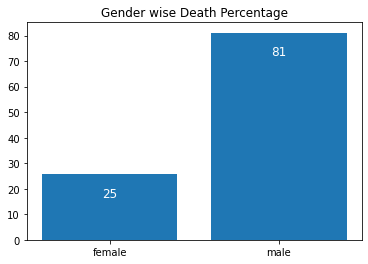

In [135]:
plt.bar(dead_gender_percentage.index,dead_gender_percentage.values)
plt.title('Gender wise Death Percentage')
for i, value in enumerate(dead_gender_percentage.values):
    plt.text(i, value-5, int(value), fontsize=12, color='white', 
             horizontalalignment='center', verticalalignment='top')
plt.show()
#Gender wise Death Percentage

In [136]:
survived_class=titanic.groupby('Pclass')['Survived'].sum()
total_class=titanic.groupby('Pclass')['Survived'].count()
dead_class=total_class-survived_class
dead_class_percentage=(dead_class/total_class)*100
dead_class_percentage=dead_class_percentage.rename(index={1:'First Class',2:'Second Class',3:'Third Class'})
dead_class_percentage

Pclass
First Class     37.037037
Second Class    52.717391
Third Class     75.763747
Name: Survived, dtype: float64

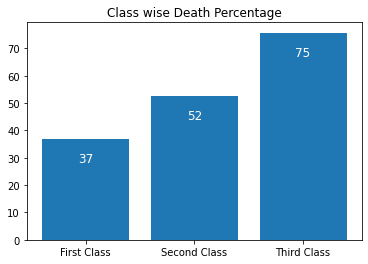

In [137]:
plt.bar(dead_class_percentage.index,dead_class_percentage.values)
plt.title('Class wise Death Percentage')
for i, value in enumerate(dead_class_percentage.values):
    plt.text(i, value-5, int(value), fontsize=12, color='white', 
             horizontalalignment='center', verticalalignment='top')
plt.show()
#Class wise Death Percentage

In [138]:
notalone = np.where((titanic.SibSp + titanic.Parch) >= 1, 'Not Alone', 'Alone')
loneliness_survival = titanic.groupby(notalone, as_index=False)['Survived'].agg([np.sum, np.size])
loneliness_survival = loneliness_survival.rename(columns={'sum':'Survived', 'size':'Total'})
loneliness_survival['Survival Rate'] = (loneliness_survival.Survived/loneliness_survival.Total)*100
loneliness_survival

,Survived,Total,Survival Rate
Alone,163,537,30.353818
Not Alone,179,354,50.564972


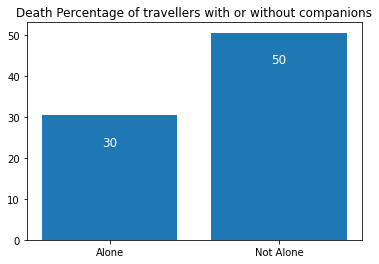

In [139]:
plt.bar(loneliness_survival.index,loneliness_survival['Survival Rate'])
plt.title('Death Percentage of travellers with or without companions')
for i, value in enumerate(loneliness_survival['Survival Rate']):
    plt.text(i, value-5, int(value), fontsize=12, color='white', 
             horizontalalignment='center', verticalalignment='top')
plt.show()
#Lonliness Survival

In [140]:
#Observing the reults we can see that people travelling with someone had a much higher(almost 20%) chance of survival.

In [142]:
pd.concat([titanic.Survived,titanic.Fare],axis=1)

,Survived,Fare
0,0,7.2500
1,1,71.2833
2,1,7.9250
3,1,53.1000
4,0,8.0500
...,...,...
886,0,13.0000
887,1,30.0000
888,0,23.4500
889,1,30.0000


C:\Users\Nikhil Manglik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


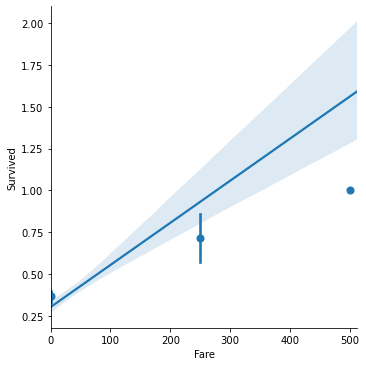

In [143]:
frange=[0,250,500,750]
ax = sns.lmplot('Fare', 'Survived', data = titanic, 
               palette = 'summer', x_bins = frange)

In [144]:
#Using this graph we can see that people who bought an expensive ticket had a higher chance of survival.